In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from itertools import compress
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset, zoomed_inset_axes
from ipywidgets import interactive, interact
import ipywidgets as widgets

import sys
# sys.path.append('/Users/Qian/Documents/Pyckages')
from PaulTrapAnalysis.components.Electrode import SimulatedElectrode
from PaulTrapAnalysis.components.Trap import Trap
from PaulTrapAnalysis.components.Multipoles import MultipoleControl
import PaulTrapAnalysis as PTA

# define some useful functions

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# import data, and define parameters

In [3]:
prefix = f"{PTA.example_data_dir}\IonTrapLattice_21_1_inventor_color" # prefix of the file names
electrode_list = [
                         'DC0', 'DC1', 'DC2', 'DC3', 'DC4', 'DC5', 'DC6', 'DC7', 'DC8',
                         'RF1', 'RF2'
                        ]
trap_v21 = Trap()
for elec in electrode_list:
    print(elec)
    trap_v21.update_electrodes(SimulatedElectrode.from_vtk(elec_name = elec, scale = 10, file = prefix + '_' + elec + '.vtk'))
#scale = new/old = 1 mm / 100 um, 100um: a0 in bem simulation, 1mm: unit in multipole expansion

DC0
DC1
DC2
DC3
DC4
DC5


C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `Un

DC6
DC7
DC8
RF1
RF2


C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(
C:\Users\electron\miniconda3\envs\e\lib\site-packages\pyvista\core\grid.py:873: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(


In [4]:
position = [0,0,0.2] # trap location where you want to expand the field, in mm unit
nROI = 0.005 # expand the field in a 2*5=10 um cube
roi = [nROI,nROI,nROI]
order = 2 # expansion order
controlled_electrodes = [
                         'DC0', 'DC1', 'DC2', 'DC3', 'DC4', 'DC5', 'DC6', 'DC7', 'DC8',
                         # 'RF1', 'RF2'
                        ] # electrodes that will be used to generate DC field
used_order1multipoles = ['Ey', 'Ez', 'Ex'] # first order multipole that will be controlled
used_order2multipoles = ['U3', 'U4', 'U2', 'U5', 'U1'] # second order multipole that will be controlled
used_multipoles = used_order1multipoles + used_order2multipoles
print(used_multipoles)

['Ey', 'Ez', 'Ex', 'U3', 'U4', 'U2', 'U5', 'U1']


# create object

In [5]:
s = MultipoleControl(trap_v21, position, roi, controlled_electrodes, used_multipoles, order)
print('Multipole names:', s.multipole_names)
print('Normalization factors:', s.normalization_factors)

Multipole names: ['C', 'Ey', 'Ez', 'Ex', 'U3', 'U4', 'U2', 'U5', 'U1']
Normalization factors: [0.28209479 0.48860251 0.48860251 0.48860251 1.09254843 1.09254843
 0.63078313 1.09254843 0.54627422]


In [6]:
s.multipole_expansion

,DC0,DC1,DC2,DC3,DC4,DC5,DC6,DC7,DC8,RF1,RF2
C,0.045354,0.007319,0.007304,0.007289,0.007227,0.007315,0.007276,0.007287,0.007246,0.446654,0.446637
Ey,0.000494,0.124338,0.077431,-0.001750,0.002405,-0.124535,-0.077630,0.001713,-0.002413,-0.000015,0.000047
Ez,0.068772,-0.046597,-0.113372,-0.046677,-0.113425,-0.046643,-0.113316,-0.046613,-0.113415,0.240735,0.240878
Ex,-0.000105,0.001791,-0.002465,0.124529,0.077947,-0.001830,0.002467,-0.124412,-0.077794,-0.000014,-0.000128
U3,0.005517,0.035222,-0.034027,-0.036660,0.041392,0.032969,-0.036221,-0.039445,0.039185,-122.210956,122.211430
U4,0.002931,-1.361096,-1.660043,0.027066,-0.023137,1.359562,1.660342,-0.026568,0.023445,-0.000347,-0.000399
U2,6.085975,0.283692,1.192173,0.282425,1.191086,0.284107,1.191911,0.282329,1.190546,-6.185211,-6.185901
U5,0.000501,-0.026507,0.023159,-1.362471,-1.663429,0.027016,-0.022828,1.362939,1.662697,0.000208,-0.000739
U1,-0.004655,-1.143510,-0.545745,1.143811,0.546634,-1.143836,-0.545897,1.143595,0.546583,-0.006778,0.008911


# plot multipole coefficients vs multipole names for each electrode at a certain height

In [7]:
v1 = pd.Series(np.zeros(len(controlled_electrodes)), index = controlled_electrodes)
vs = []
for ele in s.trap.names:
    v = v1.copy()
    v[ele] = 1
    vs.append(v)
# print vs

def plot_multipole_vs_expansion_height(height):
    position1 = [0, 0, height*1e-3]
    s.update_origin_roi(position1, roi)
#     print np.dot(s.multipole_expansions,vs[0])

    Nmulti = s.multipole_expansion.shape[0]

    fig,ax = plt.subplots(len(vs),1,figsize = (10, 24))
    for i,v in enumerate(vs):
        coeffs = s.setVoltages(v)
        ax[i].bar(range(Nmulti),coeffs)
        max_coeff = np.max(coeffs)
        min_coeff = np.min(coeffs)
        margin = (max_coeff - min_coeff)*0.5
        ymax = max_coeff + margin
        ymin = min_coeff - margin
        ax[i].set_ylim(ymin, ymax)
        ax[i].set_title(s.trap.names[i])
        fig.canvas.draw()
        add_value_labels(ax[i])
    plt.xticks(range(Nmulti), s.multipole_print_names, rotation = -90)
    fig.tight_layout(pad=1)
    plt.show()
    
interactive_plot = interactive(plot_multipole_vs_expansion_height, height = (50, 250))
output = interactive_plot.children[-1]
output.layout.height = '1800px'
interactive_plot

interactive(children=(IntSlider(value=150, description='height', max=250, min=50), Output(layout=Layout(height…

# plot multipole coefficients vs different heights for each electrode

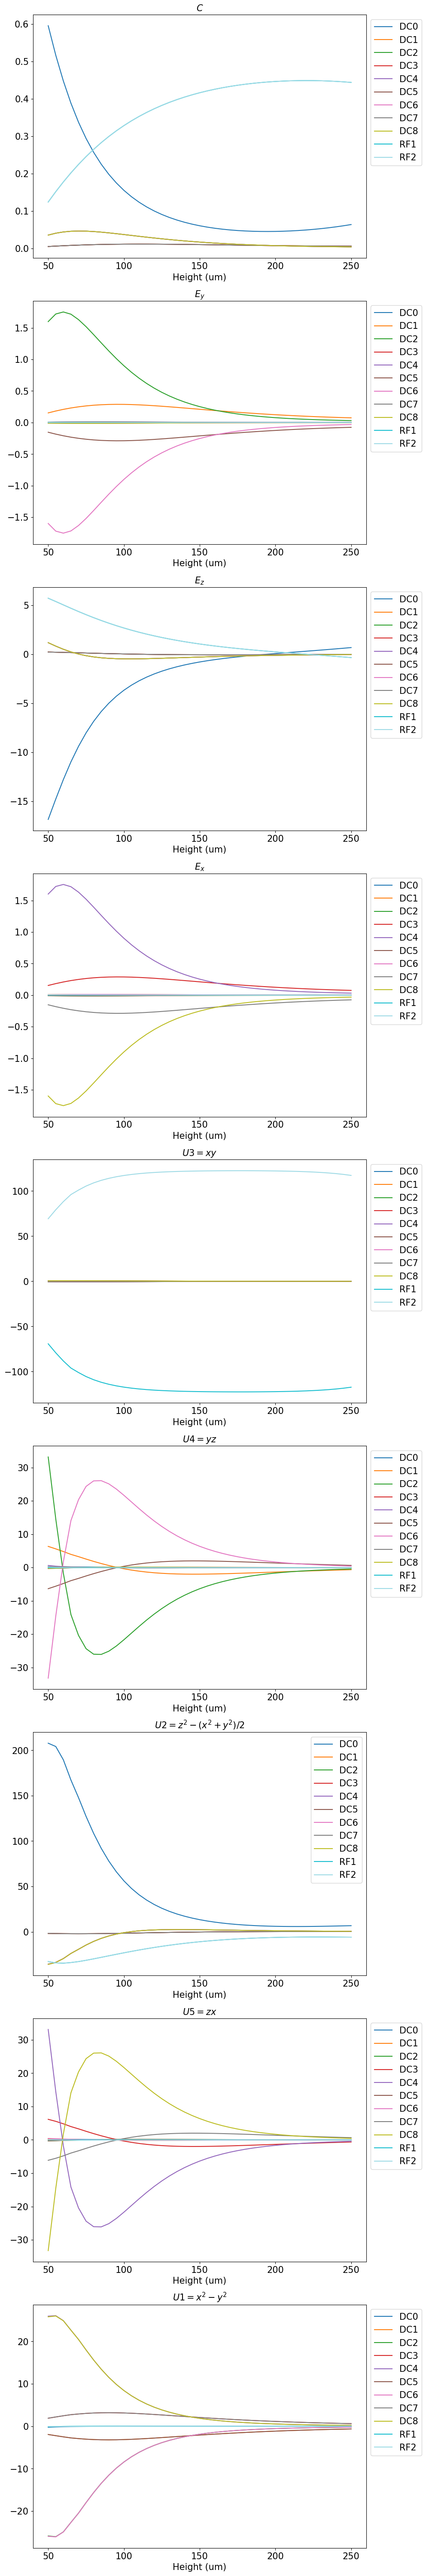

In [8]:
height_list = np.arange(50,255,5)
numMUltipoles = len(s.multipole_print_names)
ne = len(s.trap.names)
multipoles_vs_height = np.zeros((len(height_list), numMUltipoles, ne))
for i, height in enumerate(height_list):
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    multipoles_vs_height[i] = np.asarray(s.multipole_expansion.loc[s.multipole_names])

size = 15
fig,ax = plt.subplots(numMUltipoles,1,figsize = (10,60))

from matplotlib import cm
colormap = cm.get_cmap('tab20')
def update_colors(ax):
    lines = ax.lines
    colors = colormap(np.linspace(0, 1, len(lines)))
    for line, c in zip(lines, colors):
        line.set_color(c)

for i, mul in enumerate(s.multipole_print_names):
    for j, ele in enumerate(s.trap.names):
        ax[i].plot(height_list, multipoles_vs_height[:,i,j], label = ele)
        ax[i].set_title(mul, fontsize = size)
        ax[i].set_xticks(np.arange(50,255,50))
#         ax[i].set_xlim(left=50, right=100)
        ax[i].tick_params(labelsize = size)
        ax[i].set_xlabel('Height (um)', fontsize = size)
    update_colors(ax[i])
    ax[i].legend(fontsize = size, bbox_to_anchor=(1, 1))
        
fig.canvas.draw()
fig.tight_layout(pad=1)

# plot voltage solution of a group of multipole coefficients

In [9]:
def plot_muls(height, ey, ez, ex, u3, u4, u2, u5, u1):
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    multipole_coeffs = {'Ey': ey, 'Ez':ez, 'Ex': ex, 'U3':u3, 'U4':u4, 'U2':u2, 'U5':u5, 'U1':u1}
    voltages = s.setMultipoles(multipole_coeffs)
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,12))
    fig, ax1 = plt.subplots(figsize = (10,8))
    ax1.bar(s.controlled_elecs, voltages)
    ax1.set_xticklabels(s.trap.names, rotation = 45, fontsize = 12)
#     ax1.set_ylim(-25, 40)
    ax1.set_ylabel('V')
    
interactive_plot = interactive(plot_muls, height = (50, 250), ez=(-1, 1, 0.1), ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=150, description='height', max=250, min=50), FloatSlider(value=0.0, desc…

# plot coefficients can be achieved for each multipole (controlled individually) when apply max 10 volts

Text(0, 0.5, '$Ca^{+}$ trap frequency (MHz)')

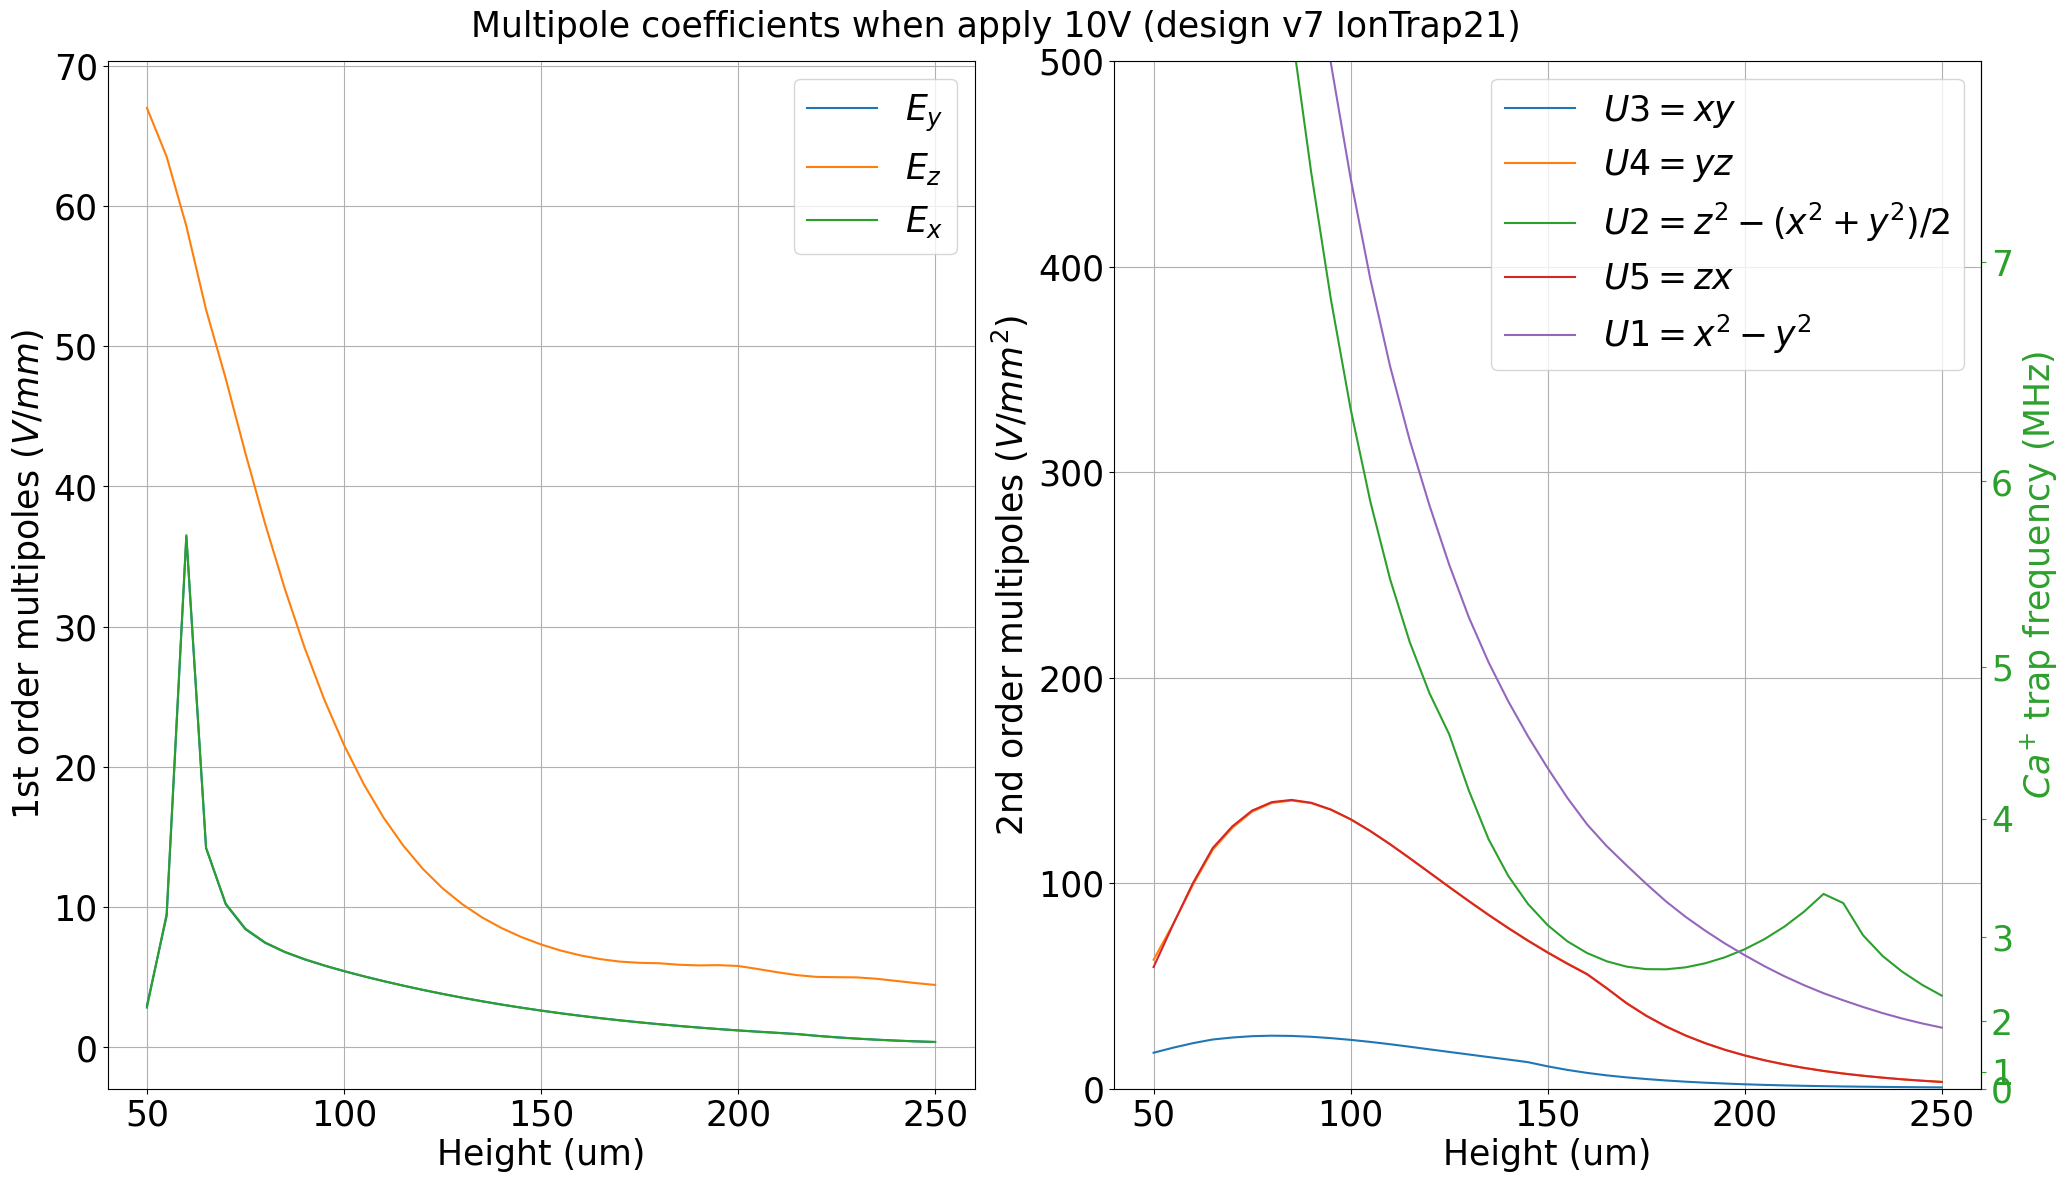

In [10]:
height_list = np.arange(50,255,5)
numMUltipoles = len(used_multipoles)
Coeffs = pd.DataFrame()
for height in height_list:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    
    Coeffs_temp = pd.Series(dtype = 'float64')
    for key in used_multipoles:
        multipole_coeffs = pd.Series(np.zeros(len(used_multipoles)), index = used_multipoles)
        multipole_coeffs[key] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        max_v = np.max(abs(voltages))
        Coeffs_temp[key] = 10/max_v
    
    Coeffs[height] = Coeffs_temp

size = 25
# plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,12))
for mul in used_order1multipoles:
    ax1.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax1.set_ylabel(r'1st order multipoles $(V/mm)$', fontsize = size)
ax1.set_xticks(np.arange(height_list[0],height_list[-1]+1,50))
ax1.set_xlabel('Height (um)', fontsize = size)
ax1.tick_params(labelsize = size)
ax1.legend(fontsize = size)

# ax1.set_ylim(0, 30) # set ylim

ax1.grid(True)

for mul in used_order2multipoles:
    ax2.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax2.set_ylabel(r'2nd order multipoles $(V/mm^2)$', fontsize = size)
ax2.set_xticks(np.arange(height_list[0],height_list[-1]+1,50))
ax2.set_xlabel('Height (um)', fontsize = size)

ax2.set_ylim((0,500)) # set ylim

def U2_to_mhz(u2):
    m = 40.078 * 1.66e-27
    e = 1.6e-19
    return np.sqrt(2*e*u2*1e6/m) / 2 / np.pi / 1e6
def mhz_to_U2(mhz):
    m = 40.078 * 1.66e-27
    e = 1.6e-19
    return 4 * np.pi**2 * 1e12 * 1e-6 * m * mhz**2 / 2 / e

ax2.tick_params(labelsize = size)
ax2.legend(fontsize = size)
ax2.grid(True)
fig.suptitle('Multipole coefficients when apply 10V (design v7 IonTrap21)', fontsize = size)
fig.tight_layout(pad=1)

secax = ax2.secondary_yaxis('right', functions = (U2_to_mhz, mhz_to_U2))
secax.tick_params(labelsize = size, colors = '#2ca02c')
secax.set_ylabel('$Ca^{+}$ trap frequency (MHz)', fontsize = size, color = '#2ca02c')
# plt.show()

# plt.savefig('Multipole_coeffs_20v_rfbias.jpg', format = 'jpg', dpi = 300)

# Plot only trap frequency

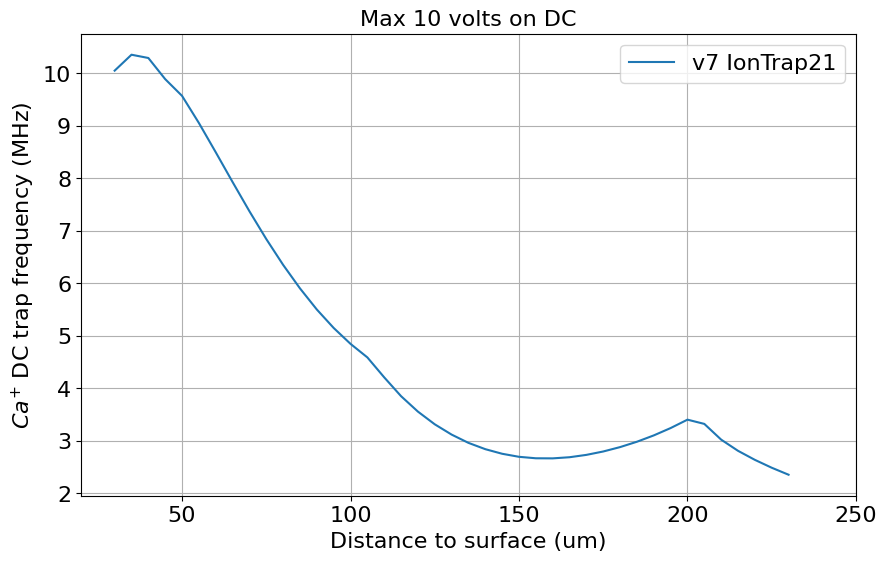

In [11]:
def U2_to_mhz(u2):
    m = 40.078 * 1.66e-27
    e = 1.6e-19
    return np.sqrt(2*e*u2*1e6/m) / 2 / np.pi / 1e6
def mhz_to_U2(mhz):
    m = 40.078 * 1.66e-27
    e = 1.6e-19
    return 4 * np.pi**2 * 1e12 * 1e-6 * m * mhz**2 / 2 / e

height_list = np.arange(50,255,5)
numMUltipoles = len(used_multipoles)
Coeffs = pd.DataFrame(dtype = 'float64')
for height in height_list:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    
    Coeffs_temp = pd.Series(dtype = 'float64')
    for key in used_multipoles:
        multipole_coeffs = pd.Series(np.zeros(len(used_multipoles)), index = used_multipoles)
        multipole_coeffs[key] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        max_v = np.max(abs(voltages))
        Coeffs_temp[key] = 10/max_v
    
    Coeffs[height] = Coeffs_temp

size = 16

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.plot(height_list-20, U2_to_mhz(Coeffs.loc['U2']), label = 'v7 IonTrap21')
ax2.set_ylabel(r'$Ca^{+}$ DC trap frequency (MHz)', fontsize = size)
ax2.set_xticks(np.arange(height_list[0],height_list[-1]+1,50))
ax2.set_xlabel('Distance to surface (um)', fontsize = size)
ax2.set_title('Max 10 volts on DC', fontsize = size)
ax2.tick_params(labelsize = size)
ax2.legend(fontsize = size)
ax2.grid(True)

# ax2.set_ylim((0,500)) # set ylim

# plt.savefig('axial_freq_10volts_v7_vs_v2.jpg', format = 'jpg', dpi = 300)

# plot potential projection along x, y, z axis when apply voltage solution of a group of multipole coefficients

In [12]:
def plot_1d(height, ey, ez, ex, u3, u4, u2, u5, u1):
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    multipole_coeffs = {'Ey': ey, 'Ez':ez, 'Ex': ex, 'U3':u3, 'U4':u4, 'U2':u2, 'U5':u5, 'U1':u1}
    voltages = s.setMultipoles(multipole_coeffs)
    potential_roi = s.potentialControl_roi(voltages)
    potential_regen = s.potentialControl_regen(voltages)
    
    potential_z_roi = potential_roi.sel(x = 0, y = 0)
    potential_z_regen = potential_regen.sel(x = 0, y = 0)
    potential_x_roi = potential_roi.sel(y = 0, z = height*1e-3, method = 'nearest')
    potential_x_regen = potential_regen.sel(y = 0, z = height*1e-3, method = 'nearest')
    potential_y_roi = potential_roi.sel(x = 0, z = height*1e-3, method = 'nearest')
    potential_y_regen = potential_regen.sel(x = 0, z = height*1e-3, method = 'nearest')
    
    offset = potential_roi.sel(x = 0, y = 0, z = height*1e-3, method = 'nearest') - potential_regen.sel(x = 0, y = 0, z = height*1e-3, method = 'nearest')
    print(offset)
    
    fsize = 20
    
    fig1, ax = plt.subplots(3,1,figsize = (10,20))
    ax[0].set_title('Potential along X', fontsize = fsize)
    ax[0].plot(potential_x_roi.x, potential_x_roi, label = 'original')
    ax[0].plot(potential_x_regen.x, potential_x_regen + offset, label = 'regenerated + offset')
    ax[0].set_xlabel('X (mm)', fontsize = fsize)
    ax[0].set_ylabel('V (v)', fontsize = fsize)
    ax[0].legend(fontsize = fsize)
    
    ax[1].set_title('Potential along Y', fontsize = fsize)
    ax[1].plot(potential_y_roi.y, potential_y_roi, label = 'original')
    ax[1].plot(potential_y_regen.y, potential_y_regen + offset, label = 'regenerated + offset')
    ax[1].set_xlabel('Y (mm)', fontsize = fsize)
    ax[1].set_ylabel('V (v)', fontsize = fsize)
    ax[1].legend(fontsize = fsize)
    
    ax[2].set_title('Potential along Z', fontsize = fsize)
    ax[2].plot(potential_z_roi.z, potential_z_roi, label = 'original')
    ax[2].plot(potential_z_regen.z, potential_z_regen + offset, label = 'regenerated + offset')
    ax[2].set_xlabel('Z (mm)', fontsize = fsize)
    ax[2].set_ylabel('V (v)', fontsize = fsize)
    ax[2].legend(fontsize = fsize)
    
    fig1.tight_layout(pad=1)
    
    plt.show()
    
interactive_plot = interactive(plot_1d, height = (50, 250), ez=(-1, 1, 0.1), ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '1500px'
interactive_plot

interactive(children=(IntSlider(value=150, description='height', max=250, min=50), FloatSlider(value=0.0, desc…

# plot potential projection in xy plane when apply voltage solution of a group of multipole coefficients

In [13]:
def plot_U2(height, ey, ez, ex, u3, u4, u2, u5, u1):
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    multipole_coeffs = {'Ey': ey, 'Ez':ez, 'Ex': ex, 'U3':u3, 'U4':u4, 'U2':u2, 'U5':u5, 'U1':u1}
    voltages = s.setMultipoles(multipole_coeffs)
    potential_roi = s.potentialControl_roi(voltages)
    potential_regen = s.potentialControl_regen(voltages)
    
    potential_xy_roi = potential_roi.sel(z = height*1e-3, l = '')
    potential_xy_regen = potential_regen.sel(z = height*1e-3, l = '')
    
    
    fsize = 20
    
    fig1 = plt.figure(figsize = (20,16))
    grid = plt.GridSpec(2,2)
    ax1 = fig1.add_subplot(grid[0,0])
    ax2 = fig1.add_subplot(grid[0,1])
    ax3 = fig1.add_subplot(grid[1,:])
    ax1.set_title('Simulated potential', fontsize = fsize)
    levels1 = np.linspace(np.amin(potential_xy_roi),np.amax(potential_xy_roi),100)
    plot1 = ax1.contourf(potential_xy_roi.x, potential_xy_roi.y, potential_xy_roi, levels1, cmap = plt.cm.viridis)
    plot1_line = ax1.contour(potential_xy_roi.x, potential_xy_roi.y, potential_xy_roi, colors = 'w')
#     ax1.clabel(plot1_line, inline = 1, fontsize = fsize)
    ax1.clabel(plot1_line, colors = 'w', fmt = '%2.3f', fontsize=fsize)
    ax1.set_xlabel('X (mm)', fontsize = fsize)
    ax1.set_ylabel('Y (mm)', fontsize = fsize)
    plt.colorbar(plot1, ax = ax1)
    
    ax2.set_title('Regenerated potential', fontsize = fsize)
    levels2 = np.linspace(np.amin(potential_xy_regen),np.amax(potential_xy_regen),100)
    plot2 = ax2.contourf(potential_xy_regen.x, potential_xy_regen.y, potential_xy_regen, levels2, cmap = plt.cm.viridis)
    plot2_line = ax2.contour(potential_xy_regen.x, potential_xy_regen.y, potential_xy_regen, colors = 'w')
#     ax2.clabel(plot2, inline = 1, fontsize = fsize)
    ax2.clabel(plot2_line, colors = 'w', fmt = '%2.3f', fontsize=fsize)
    ax2.set_xlabel('X (mm)', fontsize = fsize)
    plt.colorbar(plot2, ax = ax2)
    
    coeffs = s.setVoltages(voltages)
#     print(coeffs.index)
    ax3.bar(range(len(coeffs)),np.asarray(coeffs))
    max_coeff = np.max(coeffs)
    min_coeff = np.min(coeffs)
    margin = (max_coeff - min_coeff)*0.1
    ymax = max_coeff + margin
    ymin = min_coeff - margin
    ax3.set_ylim(ymin, ymax)
    add_value_labels(ax3)
    ax3.set_xticks(range(len(coeffs)))
    ax3.set_xticklabels(s.multipole_names, rotation = -90, fontsize = fsize)
    plt.show()
    
interactive_plot = interactive(plot_U2, height = (50, 250), ez=(-1, 1, 0.1), ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=150, description='height', max=250, min=50), FloatSlider(value=0.0, desc…

# Min L∞ norm

# plot coefficients can be achieved for each multipole (controlled individually) when apply max 10 volts. Method: minimize max voltage applied instead of minimizing norm in the above plot

# plot voltage solution of a group of multipole coefficients

In [14]:
def plot_muls(height, ey, ez, ex, u3, u4, u2, u5, u1):
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    multipole_coeffs = pd.Series({'Ey': ey, 'Ez':ez, 'Ex': ex, 'U3':u3, 'U4':u4, 'U2':u2, 'U5':u5, 'U1':u1})
    voltages = s.min_linf(multipole_coeffs, s.expansion_matrix)
    fig, ax1 = plt.subplots(figsize = (10,8))
    ax1.bar(s.controlled_elecs, voltages)
    ax1.set_xticklabels(s.trap.names, rotation = 45, fontsize = 12)
#     ax1.set_ylim(-25, 40)
    ax1.set_ylabel('V')
    
interactive_plot = interactive(plot_muls, height = (50, 250), ez=(-1, 1, 0.1), ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=150, description='height', max=250, min=50), FloatSlider(value=0.0, desc…

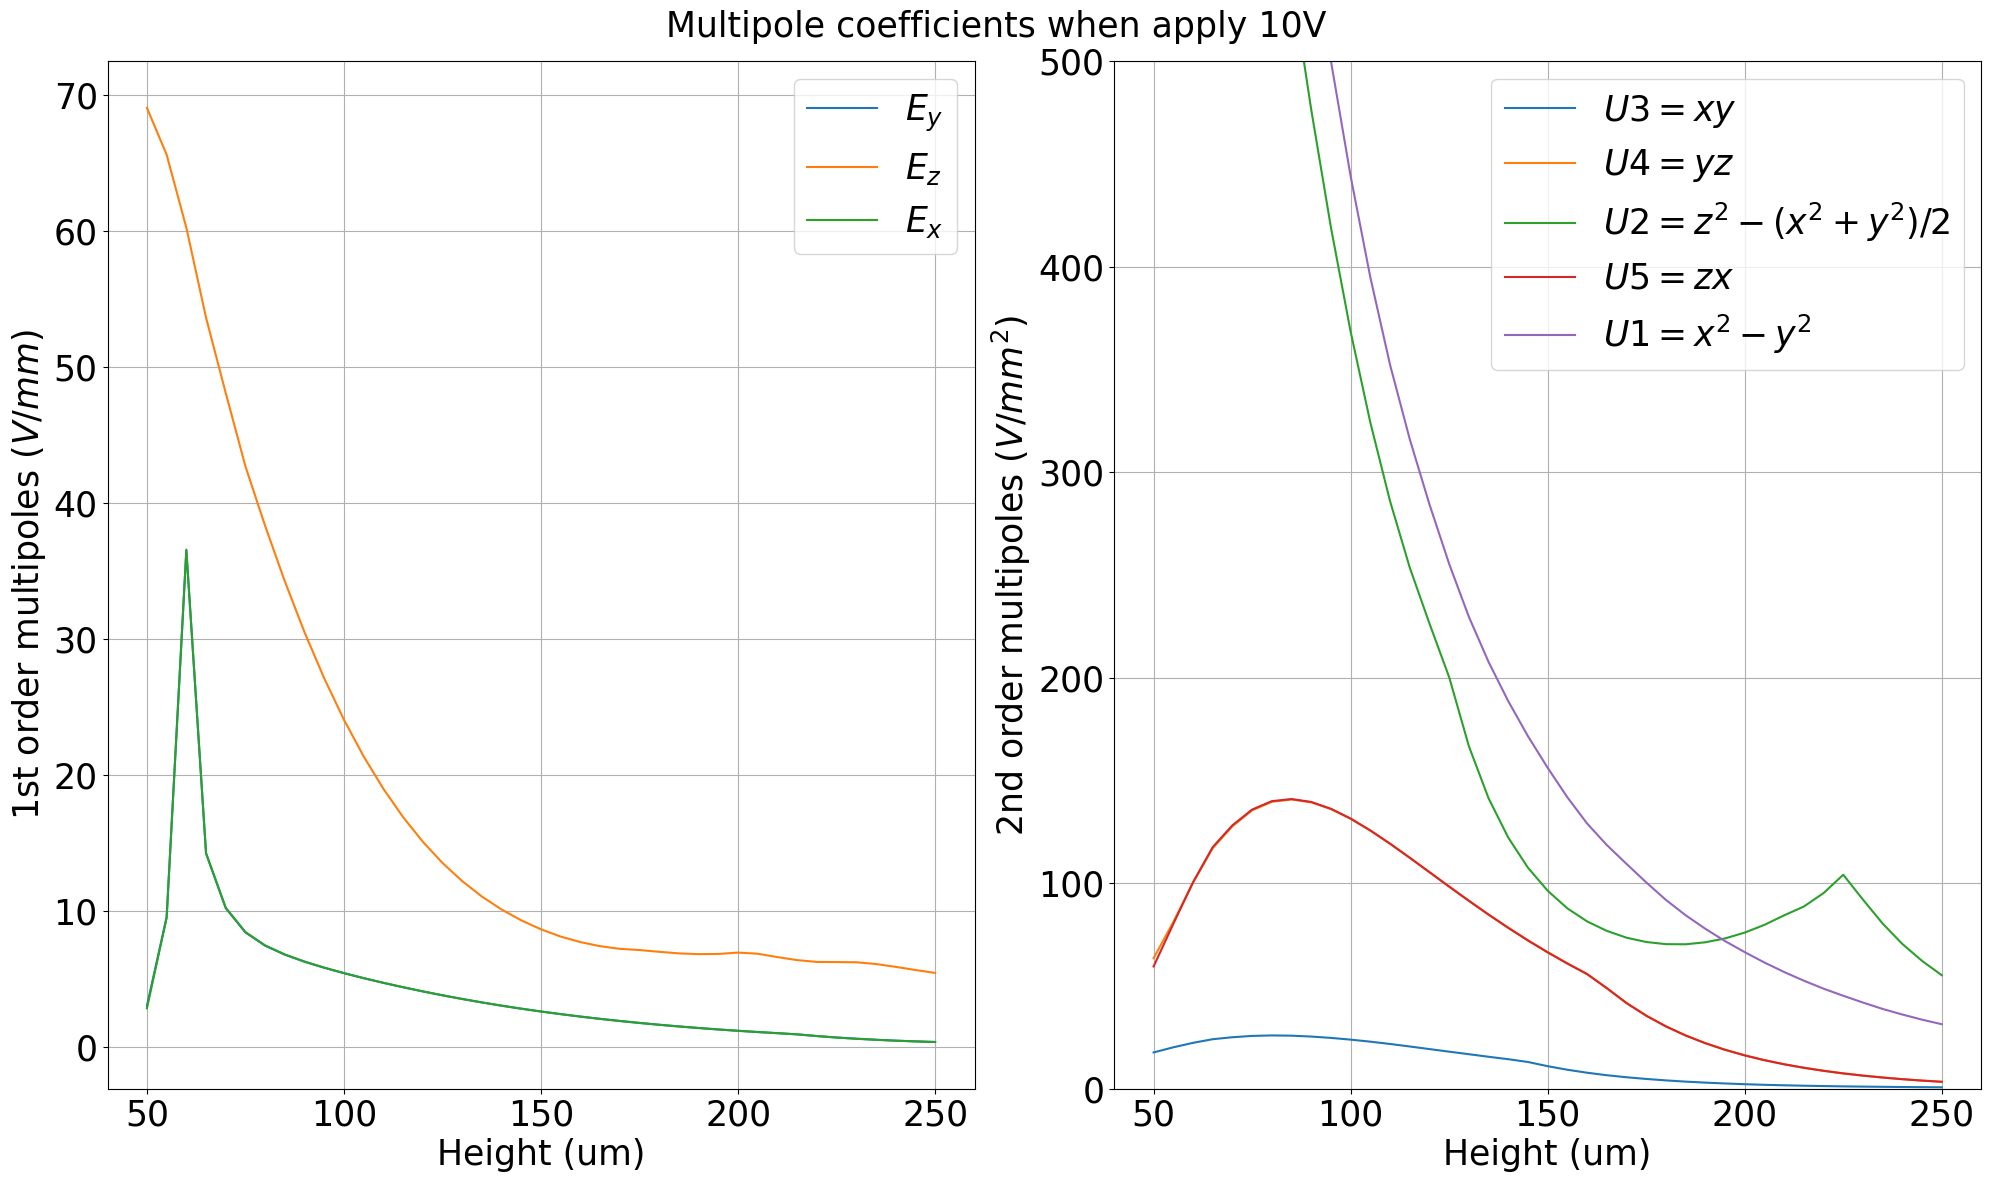

In [15]:
height_list = np.arange(50,255,5)
numMUltipoles = len(used_multipoles)
Coeffs = pd.DataFrame()
for height in height_list:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    
    Coeffs_temp = pd.Series(dtype = 'float64')
    for key in used_multipoles:
        multipole_coeffs = pd.Series(np.zeros(len(used_multipoles)), index = used_multipoles)
        multipole_coeffs[key] = 1
        voltages = s.min_linf(multipole_coeffs, s.expansion_matrix)
        max_v = np.max(abs(voltages))
        Coeffs_temp[key] = 10/max_v
    
    Coeffs[height] = Coeffs_temp

size = 25
# plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,12))
for mul in used_order1multipoles:
    ax1.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax1.set_ylabel(r'1st order multipoles $(V/mm)$', fontsize = size)
ax1.set_xticks(np.arange(height_list[0],height_list[-1]+1,50))
ax1.set_xlabel('Height (um)', fontsize = size)
ax1.tick_params(labelsize = size)
ax1.legend(fontsize = size)

# ax1.set_ylim(0, 10) # set ylim

ax1.grid(True)

for mul in used_order2multipoles:
    ax2.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax2.set_ylabel(r'2nd order multipoles $(V/mm^2)$', fontsize = size)
ax2.set_xticks(np.arange(height_list[0],height_list[-1]+1,50))
ax2.set_xlabel('Height (um)', fontsize = size)

ax2.set_ylim((0,500)) # set ylim

ax2.tick_params(labelsize = size)
ax2.legend(fontsize = size)
ax2.grid(True)
fig.suptitle('Multipole coefficients when apply 10V', fontsize = size)
fig.tight_layout(pad=1)

# plt.savefig('Multipole_coeffs_20v_rfbias.jpg', format = 'jpg', dpi = 300)

# Generating cfile for experiment control

In [16]:
heights = np.arange(50,250,10)
for height in heights:
    print(height)
    position1 = [0, 0, height*1e-3]
    nROI = 0.005 # expand the field in a 2*5 um cube
    roi = [nROI,nROI,nROI]
    s.update_origin_roi(position1, roi)
    display(s.pinv_matrix)

50


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000647,-0.099607,-0.000449,-0.000482,0.000029,-0.003263,0.000023,0.000003
DC1,-3.204166,0.054241,-0.241576,0.556974,0.155672,0.003996,0.009378,-0.011612
DC2,0.620433,-0.149265,0.003825,-0.043073,-0.014905,-0.012066,-0.000030,-0.008777
DC3,0.095109,-0.017214,-3.446715,-0.560961,-0.004963,-0.001709,0.167335,0.011624
DC4,0.004883,-0.144093,0.642062,0.039537,-0.000177,-0.011633,-0.015989,0.008761
DC5,3.336662,0.023043,0.146023,0.561726,-0.159295,0.002062,-0.006742,-0.010387
DC6,-0.633315,-0.145489,0.005492,-0.043700,0.015332,-0.011839,-0.000209,-0.008923
DC7,-0.266333,-0.025494,3.519971,-0.571036,0.010400,-0.001874,-0.168901,0.010594
DC8,0.003833,-0.142828,-0.651866,0.040706,-0.000071,-0.011601,0.016292,0.008883


60


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000016,-0.104669,-0.000020,-0.000218,0.000004,-0.001787,0.000003,0.000006
DC1,0.103406,0.024885,-0.004110,0.443746,0.098888,0.001556,0.003845,-0.010243
DC2,0.273374,-0.170753,-0.000527,-0.045084,-0.011819,-0.011507,0.000154,-0.009010
DC3,0.002285,-0.006387,0.095530,-0.448811,-0.003140,-0.000644,0.099884,0.010372
DC4,0.000604,-0.167772,0.273769,0.043870,-0.000205,-0.011288,-0.011885,0.008995
DC5,-0.091281,0.018650,0.012765,0.444716,-0.100674,0.001332,-0.004328,-0.010072
DC6,-0.274533,-0.169470,-0.000201,-0.045280,0.012045,-0.011462,-0.000123,-0.009043
DC7,-0.014468,-0.007843,-0.104309,-0.451032,0.005272,-0.000605,-0.099266,0.010165
DC8,0.000448,-0.167341,-0.273119,0.044244,0.000025,-0.011291,0.011841,0.009038


70


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000010,-0.108000,0.000002,-0.000130,5.119282e-07,-0.000104,0.000002,0.000006
DC1,0.976243,0.014181,0.027252,0.396496,7.785228e-02,0.000775,0.002659,-0.011583
DC2,0.157365,-0.209693,0.001137,-0.056638,-1.191539e-02,-0.013309,0.000200,-0.010559
DC3,-0.023869,-0.005372,0.973994,-0.400253,-2.482063e-03,-0.000527,0.078313,0.011695
DC4,-0.001659,-0.206971,0.157646,0.056151,-2.140391e-04,-0.013121,-0.011960,0.010546
DC5,-0.980024,0.011456,-0.024713,0.396983,-7.875100e-02,0.000727,-0.003177,-0.011522
DC6,-0.156547,-0.208822,-0.001545,-0.056773,1.206802e-02,-0.013290,-0.000130,-0.010578
DC7,0.029143,-0.006124,-0.975951,-0.401261,3.520093e-03,-0.000494,-0.077732,0.011603
DC8,0.000984,-0.206660,-0.157473,0.056391,8.189264e-05,-0.013129,0.011883,0.010577


80


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000023,-0.103855,0.000008,-0.000123,-2.682527e-07,0.002659,0.000002,0.000006
DC1,1.335676,0.001974,0.033976,0.383406,7.134559e-02,-0.000051,0.002216,-0.014110
DC2,0.095438,-0.267908,0.003122,-0.077249,-1.408400e-02,-0.016888,0.000263,-0.013162
DC3,-0.032211,-0.011950,1.336444,-0.386831,-2.182072e-03,-0.000953,0.071705,0.014215
DC4,-0.003516,-0.265083,0.095169,0.077061,-2.619985e-04,-0.016701,-0.014145,0.013147
DC5,-1.341357,0.000440,-0.035855,0.383775,-7.190529e-02,-0.000048,-0.002654,-0.014066
DC6,-0.094019,-0.267204,-0.002783,-0.077376,1.421334e-02,-0.016882,-0.000175,-0.013179
DC7,0.038936,-0.012456,-1.334017,-0.387509,2.808088e-03,-0.000928,-0.071229,0.014161
DC8,0.002250,-0.264842,-0.095744,0.077276,1.460718e-04,-0.016713,0.014053,0.013176


90


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000032,-0.083962,0.000014,-0.000143,-5.221456e-07,0.007426,0.000003,0.000008
DC1,1.586791,-0.018931,0.035437,0.391821,7.155641e-02,-0.001498,0.002014,-0.017708
DC2,0.039442,-0.350745,0.005703,-0.109045,-1.810143e-02,-0.022429,0.000365,-0.016747
DC3,-0.034962,-0.029770,1.589327,-0.395094,-2.032057e-03,-0.002177,0.071869,0.017810
DC4,-0.005900,-0.347621,0.038449,0.109063,-3.547458e-04,-0.022229,-0.018184,0.016728
DC5,-1.592872,-0.019745,-0.039734,0.392130,-7.197055e-02,-0.001461,-0.002397,-0.017670
DC6,-0.037484,-0.350176,-0.004525,-0.109174,1.823090e-02,-0.022435,-0.000258,-0.016765
DC7,0.041646,-0.030101,-1.584493,-0.395675,2.481210e-03,-0.002149,-0.071455,0.017774
DC8,0.004124,-0.347469,-0.039879,0.109297,2.388374e-04,-0.022249,0.018069,0.016758


100


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000042,-0.037020,0.000027,-0.000222,-5.494573e-07,0.015354,0.000003,0.000010
DC1,1.831946,-0.057268,0.035208,0.416276,7.596111e-02,-0.004244,0.001913,-0.022468
DC2,-0.030388,-0.463598,0.009368,-0.155675,-2.431165e-02,-0.030214,0.000527,-0.021305
DC3,-0.035602,-0.066051,1.835929,-0.420156,-1.956372e-03,-0.004774,0.076261,0.022576
DC4,-0.009336,-0.460089,-0.032399,0.155980,-5.078907e-04,-0.029996,-0.024421,0.021278
DC5,-1.838443,-0.057491,-0.041252,0.416566,-7.630847e-02,-0.004166,-0.002270,-0.022428
DC6,0.033116,-0.463184,-0.007136,-0.155814,2.445574e-02,-0.030238,-0.000393,-0.021325
DC7,0.042475,-0.066380,-1.829435,-0.420669,2.326568e-03,-0.004758,-0.075878,0.022560
DC8,0.006883,-0.460022,0.029846,0.156244,3.796414e-04,-0.030025,0.024277,0.021308


110


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000049,0.050221,0.000049,-0.000391,9.139364e-09,0.027724,0.000005,0.000015
DC1,2.106892,-0.124108,0.034224,0.456340,8.374032e-02,-0.009154,0.001863,-0.028331
DC2,-0.128826,-0.609499,0.014674,-0.222858,-3.340413e-02,-0.040263,0.000774,-0.026923
DC3,-0.035290,-0.131637,2.112217,-0.461286,-1.928320e-03,-0.009593,0.084048,0.028437
DC4,-0.014351,-0.605420,-0.132247,0.223652,-7.428032e-04,-0.040013,-0.033551,0.026887
DC5,-2.113935,-0.123527,-0.041951,0.456671,-8.404832e-02,-0.009003,-0.002219,-0.028278
DC6,0.132683,-0.609363,-0.010981,-0.223027,3.357274e-02,-0.040319,-0.000601,-0.026949
DC7,0.042882,-0.132014,-2.104234,-0.461764,2.266579e-03,-0.009601,-0.083674,0.028440
DC8,0.010871,-0.605464,0.128135,0.223963,5.921843e-04,-0.040048,0.033364,0.026917


120


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000070,0.189035,0.000101,-0.000742,-5.952818e-07,0.045520,0.000008,0.000019
DC1,2.428845,-0.229881,0.033189,0.514779,9.474670e-02,-0.016977,0.001870,-0.035110
DC2,-0.271463,-0.784911,0.022132,-0.319683,-4.639424e-02,-0.051870,0.001130,-0.033853
DC3,-0.034857,-0.236467,2.435996,-0.521479,-1.954825e-03,-0.017335,0.095095,0.035203
DC4,-0.021432,-0.780144,-0.277012,0.321334,-1.082653e-03,-0.051591,-0.046600,0.033811
DC5,-2.436995,-0.228533,-0.042840,0.515129,-9.505132e-02,-0.016769,-0.002244,-0.035046
DC6,0.277100,-0.785075,-0.016276,-0.319868,4.660906e-02,-0.051955,-0.000900,-0.033884
DC7,0.043614,-0.237046,-2.426066,-0.521955,2.292704e-03,-0.017351,-0.094697,0.035225
DC8,0.016359,-0.780285,0.270522,0.321721,8.957783e-04,-0.051643,0.046345,0.033840


130


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000133,0.383963,0.000214,-0.001395,-0.000003,0.068929,0.000015,0.000021
DC1,2.809383,-0.376548,0.032170,0.590312,0.109168,-0.027606,0.001914,-0.043499
DC2,-0.476900,-0.978380,0.032494,-0.455085,-0.064671,-0.063471,0.001641,-0.041860
DC3,-0.034518,-0.382060,2.819055,-0.599770,-0.002027,-0.027842,0.109590,0.043554
DC4,-0.031241,-0.973067,-0.485626,0.458193,-0.001569,-0.063206,-0.064962,0.041823
DC5,-2.819048,-0.374384,-0.043874,0.590743,-0.109481,-0.027355,-0.002308,-0.043411
DC6,0.485120,-0.978827,-0.023653,-0.455305,0.064947,-0.063568,-0.001340,-0.041903
DC7,0.044620,-0.382746,-2.806755,-0.600246,0.002363,-0.027846,-0.109154,0.043599
DC8,0.023983,-0.973400,0.475719,0.458683,0.001342,-0.063291,0.064615,0.041848


140


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000033,0.628152,0.000271,-0.002899,0.000002,0.096574,0.000019,0.000017
DC1,3.260098,-0.544970,0.031574,0.687549,0.127518,-0.038865,0.002047,-0.053008
DC2,-0.769100,-1.173513,0.046427,-0.644757,-0.090149,-0.072717,0.002327,-0.051490
DC3,-0.034702,-0.550561,3.272106,-0.703696,-0.002192,-0.039128,0.127997,0.052977
DC4,-0.044314,-1.166189,-0.782002,0.651152,-0.002215,-0.072284,-0.090531,0.051479
DC5,-3.270553,-0.540413,-0.046627,0.688117,-0.127783,-0.038342,-0.002502,-0.052882
DC6,0.780519,-1.175245,-0.032891,-0.645025,0.090473,-0.072972,-0.001918,-0.051553
DC7,0.047765,-0.552271,-3.257427,-0.704157,0.002584,-0.039254,-0.127542,0.053054
DC8,0.033429,-1.166206,0.767378,0.651770,0.001923,-0.072323,0.090077,0.051496


150


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,0.000035,0.903976,0.000441,-0.006143,0.000006,0.125661,0.000028,-0.000009
DC1,3.790918,-0.694949,0.033010,0.806254,0.150389,-0.046647,0.002349,-0.064105
DC2,-1.177252,-1.358466,0.063958,-0.904489,-0.125292,-0.077646,0.003195,-0.062678
DC3,-0.037063,-0.707729,3.807064,-0.837536,-0.002541,-0.047819,0.150988,0.063864
DC4,-0.060599,-1.340471,-1.196588,0.918036,-0.003022,-0.076007,-0.125804,0.062757
DC5,-3.802867,-0.687864,-0.051502,0.807053,-0.150608,-0.045898,-0.002838,-0.063923
DC6,1.193186,-1.361749,-0.044063,-0.904836,0.125658,-0.078051,-0.002670,-0.062777
DC7,0.053060,-0.710243,-3.788840,-0.837932,0.002952,-0.048001,-0.150495,0.063982
DC8,0.045017,-1.340237,1.175140,0.918797,0.002684,-0.076032,0.125217,0.062758


160


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,0.000060,1.176825,0.000746,-0.011980,0.000004,0.151478,0.000043,-0.000072
DC1,4.415966,-0.785710,0.038170,0.959231,0.178897,-0.047380,0.002940,-0.077746
DC2,-1.740355,-1.517930,0.084805,-1.270263,-0.173596,-0.075687,0.004220,-0.074613
DC3,-0.043865,-0.809854,4.437214,-1.021060,-0.003221,-0.049743,0.179632,0.077063
DC4,-0.079060,-1.479978,-1.768246,1.297347,-0.003924,-0.072047,-0.174232,0.074893
DC5,-4.429717,-0.775380,-0.060458,0.960365,-0.179027,-0.046354,-0.003428,-0.077485
DC6,1.762321,-1.523583,-0.056170,-1.270704,0.173957,-0.076314,-0.003589,-0.074770
DC7,0.063176,-0.813138,-4.414091,-1.021360,0.003608,-0.049955,-0.179095,0.077234
DC8,0.057429,-1.479495,1.737115,1.298309,0.003607,-0.072071,0.173502,0.074866


170


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000120,1.395786,0.001060,-0.015115,-0.000009,0.168313,0.000060,-0.000135
DC1,5.150171,-0.807256,0.050169,1.155291,0.214309,-0.040960,0.004162,-0.091961
DC2,-2.506843,-1.625115,0.106860,-1.772014,-0.239575,-0.063211,0.005129,-0.090174
DC3,-0.058064,-0.828445,5.180075,-1.244361,-0.004583,-0.042241,0.215284,0.090617
DC4,-0.097668,-1.582486,-2.547866,1.809081,-0.004639,-0.060395,-0.240350,0.090737
DC5,-5.166487,-0.793505,-0.076428,1.156989,-0.214299,-0.039697,-0.004572,-0.091582
DC6,2.536228,-1.633786,-0.067014,-1.772645,0.239788,-0.064079,-0.004480,-0.090430
DC7,0.079565,-0.832698,-5.151406,-1.244430,0.004792,-0.042485,-0.214760,0.090857
DC8,0.069596,-1.581418,2.504496,1.810216,0.004542,-0.060398,0.239560,0.090664


180


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000441,1.513237,0.001361,-0.015428,-0.000031,0.172097,0.000077,-0.000135
DC1,6.011413,-0.790928,0.072237,1.396866,0.258456,-0.030551,0.006194,-0.109672
DC2,-3.538247,-1.650784,0.127225,-2.442144,-0.329416,-0.037524,0.005774,-0.105607
DC3,-0.084576,-0.772311,6.051668,-1.515195,-0.006892,-0.026408,0.259677,0.107694
DC4,-0.111344,-1.666005,-3.594456,2.488152,-0.004905,-0.043313,-0.330115,0.106445
DC5,-6.030482,-0.773415,-0.102135,1.399437,-0.258197,-0.029078,-0.006370,-0.109125
DC6,3.574640,-1.663661,-0.073756,-2.443108,0.329119,-0.038692,-0.005334,-0.106025
DC7,0.105571,-0.777725,-6.016465,-1.514891,0.006629,-0.026674,-0.259249,0.108024
DC8,0.078462,-1.663916,3.536089,2.489448,0.005472,-0.043278,0.329473,0.106298


190


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000866,1.524124,0.001646,-0.020472,-0.000069,0.163809,0.000092,-0.000171
DC1,7.018340,-0.756829,0.116179,1.663254,0.313775,-0.016772,0.010044,-0.130088
DC2,-4.907995,-1.646505,0.130867,-3.322284,-0.451481,-0.004979,0.004893,-0.122727
DC3,-0.135832,-0.711308,7.072214,-1.888030,-0.011275,-0.008678,0.315268,0.126483
DC4,-0.103929,-1.709651,-4.981236,3.407606,-0.003338,-0.018747,-0.451632,0.124281
DC5,-7.040721,-0.736511,-0.146609,1.667149,-0.313159,-0.015276,-0.009646,-0.129307
DC6,4.948929,-1.663298,-0.064908,-3.323803,0.449968,-0.006308,-0.005283,-0.123404
DC7,0.151364,-0.717885,-7.030178,-1.887067,0.009946,-0.008926,-0.315164,0.126929
DC8,0.070941,-1.706183,4.907761,3.408923,0.005477,-0.018686,0.451721,0.124021


200


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.001146,1.457047,0.001831,-0.028614,-0.000105,0.147351,0.000098,-0.000230
DC1,8.195544,-0.714846,0.198915,1.916314,0.383788,0.000966,0.017181,-0.153911
DC2,-6.710350,-1.699858,0.090743,-4.440499,-0.617517,0.025885,0.000195,-0.141601
DC3,-0.228989,-0.713039,8.265699,-2.416512,-0.019361,0.006306,0.385466,0.146582
DC4,-0.047335,-1.675897,-6.797957,4.633835,0.002507,0.016249,-0.616007,0.144814
DC5,-8.220286,-0.691640,-0.223974,1.922055,-0.382653,0.002405,-0.015660,-0.152808
DC6,6.746821,-1.721464,-0.018575,-4.442706,0.613393,0.024434,-0.002672,-0.142676
DC7,0.230111,-0.720917,-8.217162,-2.414736,0.015879,0.006114,-0.386148,0.147167
DC8,0.026696,-1.670532,6.713275,4.635281,0.002986,0.016318,0.618039,0.144400


210


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000951,1.352404,0.001955,-0.029302,-0.000105,0.126921,0.000112,-0.000182
DC1,9.561573,-0.694227,0.340226,2.110624,0.473026,0.021352,0.029656,-0.182522
DC2,-9.042895,-1.837853,-0.032718,-5.759662,-0.843162,0.053456,-0.012059,-0.159653
DC3,-0.388013,-0.794109,9.650990,-3.102091,-0.033683,0.019413,0.474793,0.169340
DC4,0.103671,-1.579188,-9.137138,6.164797,0.016924,0.059143,-0.838149,0.165733
DC5,-9.586941,-0.667511,-0.350930,2.120283,-0.471213,0.022626,-0.026228,-0.180944
DC6,9.056661,-1.865922,0.094339,-5.765137,0.834067,0.051991,0.005167,-0.161398
DC7,0.359155,-0.803543,-9.600483,-3.099609,0.026201,0.019344,-0.477214,0.170082
DC8,-0.086114,-1.571289,9.055393,6.166793,-0.004852,0.059145,0.844496,0.165117


220


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,-0.000670,1.243741,0.001444,-0.013662,-0.000090,0.105500,0.000090,0.000057
DC1,11.148119,-0.746928,0.596041,2.290790,0.589056,0.041368,0.052846,-0.215182
DC2,-12.042663,-1.954004,-0.355040,-7.314461,-1.152753,0.087496,-0.042305,-0.176950
DC3,-0.674011,-0.894562,11.255499,-3.921394,-0.060165,0.037617,0.590392,0.195573
DC4,0.466774,-1.557626,-12.117895,8.036803,0.050696,0.097537,-1.140330,0.186775
DC5,-11.174740,-0.716813,-0.578528,2.304858,-0.586523,0.042289,-0.046155,-0.212990
DC6,12.002745,-1.988854,0.367166,-7.323103,1.134706,0.086298,0.026363,-0.179656
DC7,0.587512,-0.905294,-11.217930,-3.917511,0.045484,0.037797,-0.596487,0.196501
DC8,-0.364623,-1.547650,12.076220,8.038680,-0.026364,0.097258,1.155791,0.185889


230


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,0.000470,1.148596,0.000781,0.015684,0.000017,0.084480,0.000075,0.000399
DC1,12.962575,-0.886420,1.042222,2.470949,0.742494,0.061814,0.096167,-0.251356
DC2,-15.809668,-1.959335,-1.059072,-9.034470,-1.580734,0.133801,-0.110745,-0.193955
DC3,-1.166723,-0.962186,13.079533,-4.793657,-0.109051,0.065428,0.742213,0.225817
DC4,1.222099,-1.725629,-15.818089,10.165914,0.124568,0.124458,-1.554109,0.208110
DC5,-12.993183,-0.852894,-0.979699,2.490887,-0.739348,0.062238,-0.084272,-0.248328
DC6,15.675472,-2.001813,0.953553,-9.048312,1.548013,0.133078,0.077720,-0.198105
DC7,0.986655,-0.976687,-13.085208,-4.789304,0.082586,0.065865,-0.755475,0.226880
DC8,-0.969516,-1.708907,15.887407,10.169898,-0.079299,0.123885,1.587297,0.207024


240


,Ey,Ez,Ex,U3,U4,U2,U5,U1
DC0,0.003112,1.074831,0.001024,0.055482,0.000315,0.064276,0.000172,0.000764
DC1,14.988904,-1.048890,1.829468,2.572456,0.948091,0.089619,0.179619,-0.293013
DC2,-20.404223,-2.053470,-2.521206,-10.886811,-2.177155,0.175513,-0.263350,-0.206070
DC3,-2.015254,-1.105924,15.098054,-5.831346,-0.200931,0.095062,0.943624,0.261558
DC4,2.728402,-1.854425,-20.268113,12.642514,0.283287,0.159794,-2.124192,0.225412
DC5,-15.031255,-1.010477,-1.696818,2.597564,-0.945176,0.089279,-0.159464,-0.288923
DC6,20.133341,-2.106459,2.184601,-10.902842,2.122353,0.175804,0.198932,-0.212226
DC7,1.697601,-1.123881,-15.199750,-5.825831,0.155677,0.095866,-0.970850,0.262665
DC8,-2.239502,-1.831506,20.578873,12.647999,-0.203645,0.158748,2.191903,0.224290


In [17]:
multipole_names = used_multipoles
print(used_multipoles)
height_list = np.arange(80,210,10)
volts_all_heights = []
for height in height_list:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    volts_all_elecs = []
    for multip in multipole_names:
        multipole_coeffs = {'Ey':0, 'Ez':0, 'Ex': 0, 'U3':0, 'U2':0, 'U5':0, 'U1':0,'U4':0} # change this later to be compatible with used multipoles
        multipole_coeffs[multip] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        volts_all_elecs.append(voltages.values)
    volts_all_heights.append(np.ravel(volts_all_elecs, order = 'C')) # 
volts_all_heights = np.transpose(volts_all_heights)

['Ey', 'Ez', 'Ex', 'U3', 'U4', 'U2', 'U5', 'U1']


In [18]:
import csv

header1 = ['multipoles: Ey, Ez, Ex, U3, U4, U2, U5, U1'] # same order as pinv_matrix?
header2 = ['default position: 160']
with open('3d_trap21_cfile.csv', 'w', newline='') as csvfile:
    cfile = csv.writer(csvfile, delimiter=' ', escapechar = ' ', quoting = csv.QUOTE_NONE)
    cfile.writerow(header1)
    cfile.writerow(header2)
    cfile.writerows(list(volts_all_heights))
    cfile.writerow(height_list)

In [19]:
cfile_path = '3d_trap21_cfile.csv'
cfile_text = open(cfile_path).read().split('\n')[:-1]
cfile_text

['multipoles:  Ey,  Ez,  Ex,  U3,  U4,  U2,  U5,  U1',
 'default  position:  160',
 '-2.298799108774093e-05 -3.213748100797254e-05 -4.226729499332528e-05 -4.911887839441371e-05 -7.034602085551432e-05 -0.00013336982386664804 -3.340602739763056e-05 3.5399288681329226e-05 6.043697359499044e-05 -0.00011959815791890417 -0.000440840912371869 -0.0008661517930415094 -0.0011456020436126603',
 '1.335676147195286 1.5867909704661718 1.831946408382568 2.1068916027403444 2.4288447706464007 2.8093828906282954 3.260097937367683 3.7909178411016526 4.415966126023289 5.150171029900937 6.011412802025781 7.018340023669865 8.195544144690173',
 '0.09543814786200021 0.03944155466395322 -0.030387937278990553 -0.12882569132216826 -0.2714630108817089 -0.47690004112434925 -0.7691001578311742 -1.1772517931923734 -1.740354796475497 -2.5068431356169785 -3.538247293880638 -4.907995014984821 -6.710350239663982',
 '-0.032211274361972485 -0.03496203117491787 -0.035602414920450694 -0.03528962265514084 -0.0348574058381504

# For electron

Text(0, 0.5, 'electron trap frequency (MHz)')

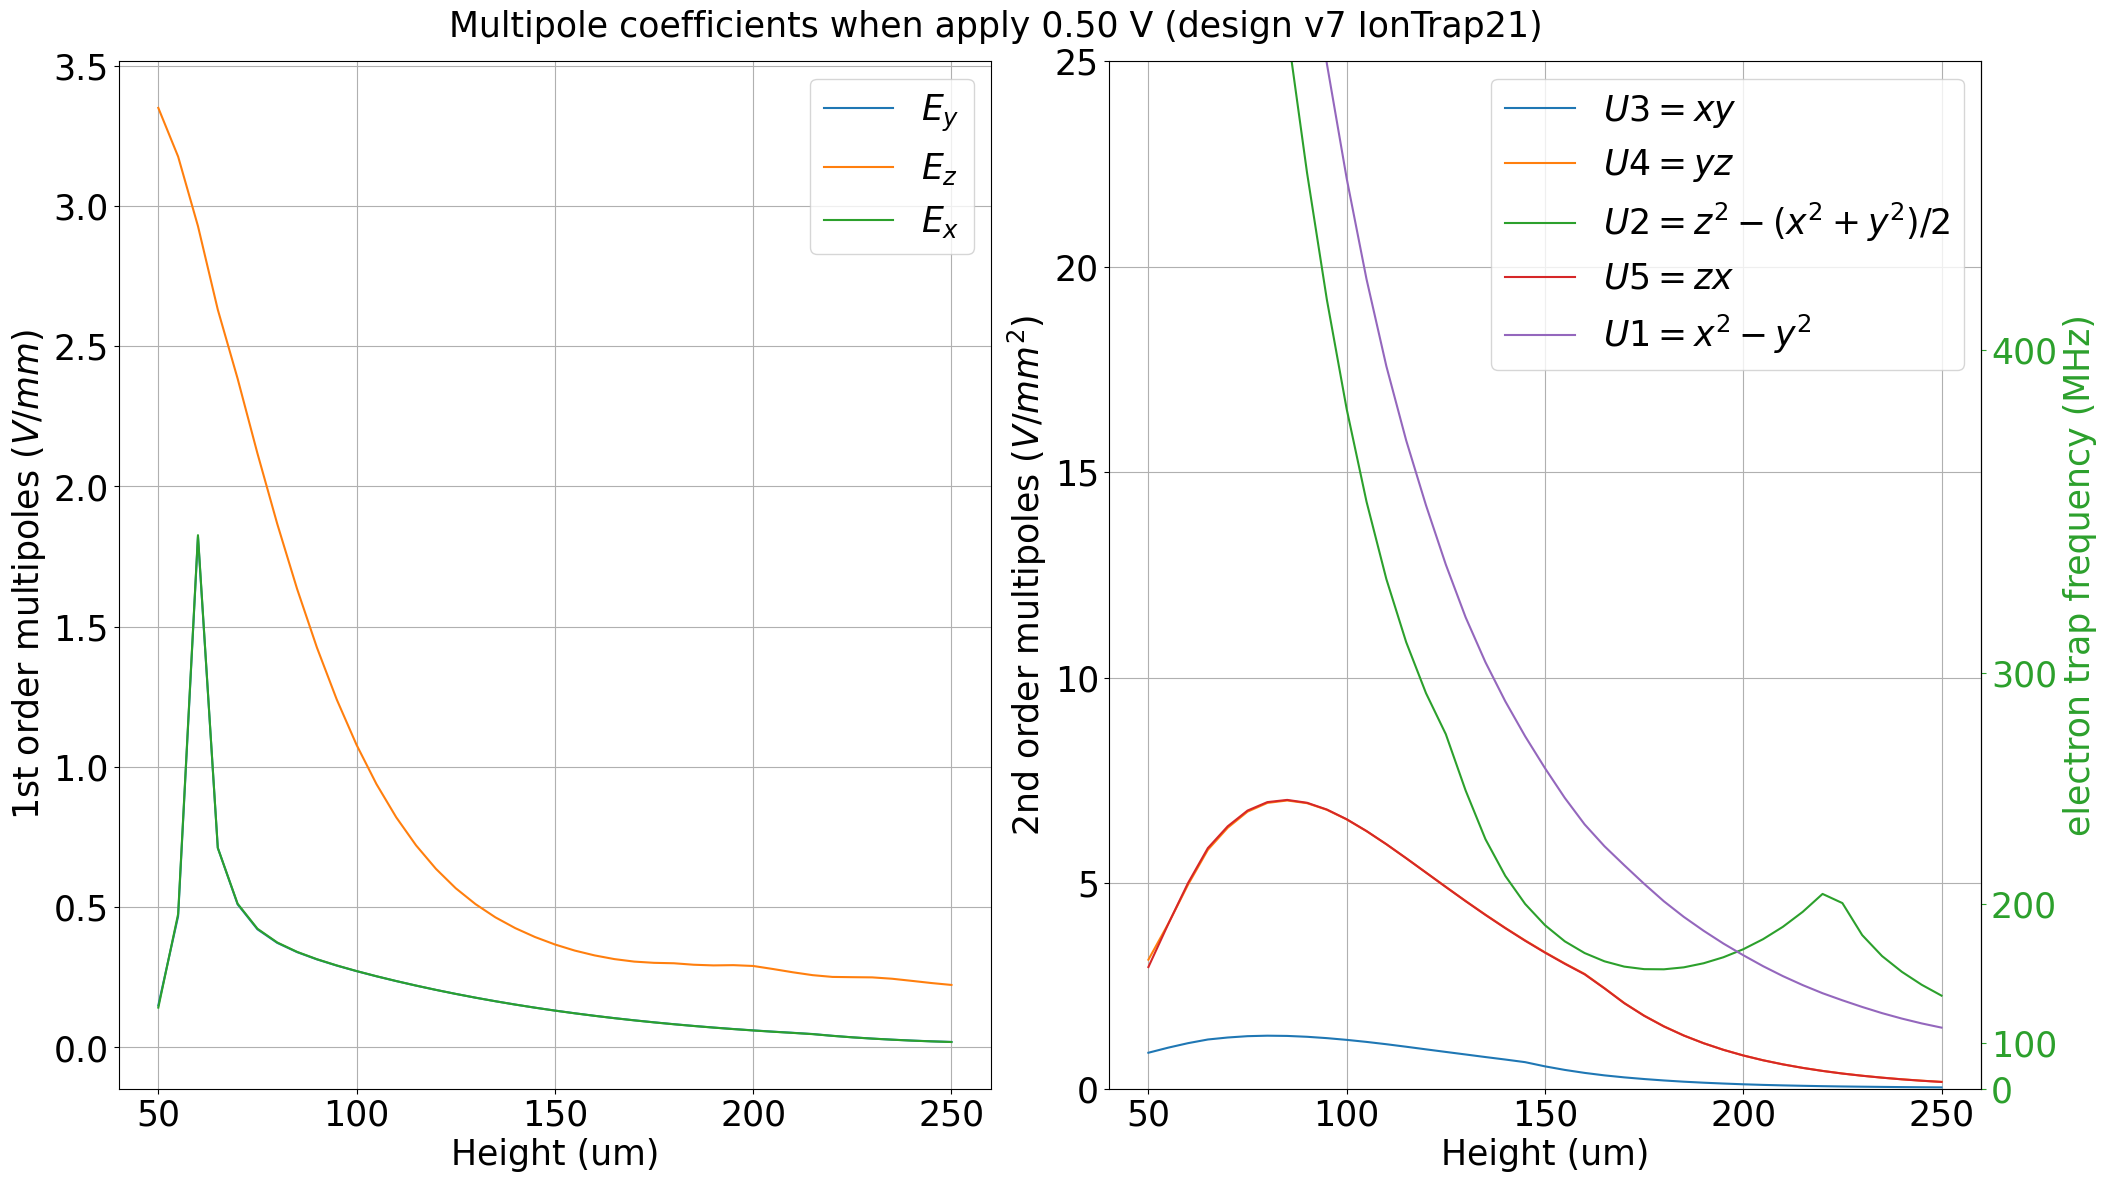

In [20]:
voltage_max = 0.5
height_list = np.arange(50,255,5)
numMUltipoles = len(used_multipoles)
Coeffs = pd.DataFrame()
for height in height_list:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    
    Coeffs_temp = pd.Series(dtype = 'float64')
    for key in used_multipoles:
        multipole_coeffs = pd.Series(np.zeros(len(used_multipoles)), index = used_multipoles)
        multipole_coeffs[key] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        max_v = np.max(abs(voltages))
        Coeffs_temp[key] = voltage_max/max_v
    
    Coeffs[height] = Coeffs_temp

size = 25
# plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,12))
for mul in used_order1multipoles:
    ax1.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax1.set_ylabel(r'1st order multipoles $(V/mm)$', fontsize = size)
ax1.set_xticks(np.arange(height_list[0],height_list[-1]+1,50))
ax1.set_xlabel('Height (um)', fontsize = size)
ax1.tick_params(labelsize = size)
ax1.legend(fontsize = size)

# ax1.set_ylim(0, 30) # set ylim

ax1.grid(True)

for mul in used_order2multipoles:
    ax2.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax2.set_ylabel(r'2nd order multipoles $(V/mm^2)$', fontsize = size)
ax2.set_xticks(np.arange(height_list[0],height_list[-1]+1,50))
ax2.set_xlabel('Height (um)', fontsize = size)

ax2.set_ylim((0,50*voltage_max)) # set ylim

def U2_to_mhz(u2):
    # m = 40.078 * 1.66e-27
    m = 9.10938356e-31
    e = 1.6e-19
    return np.sqrt(2*e*u2*1e6/m) / 2 / np.pi / 1e6
def mhz_to_U2(mhz):
    # m = 40.078 * 1.66e-27
    m = 9.10938356e-31
    e = 1.6e-19
    return 4 * np.pi**2 * 1e12 * 1e-6 * m * mhz**2 / 2 / e

ax2.tick_params(labelsize = size)
ax2.legend(fontsize = size)
ax2.grid(True)
fig.suptitle('Multipole coefficients when apply {:.2f} V (design v7 IonTrap21)'.format(voltage_max), fontsize = size)
fig.tight_layout(pad=1)

secax = ax2.secondary_yaxis('right', functions = (U2_to_mhz, mhz_to_U2))
secax.tick_params(labelsize = size, colors = '#2ca02c')
secax.set_ylabel('electron trap frequency (MHz)', fontsize = size, color = '#2ca02c')
# plt.show()

# plt.savefig('Multipole_coeffs_20v_rfbias.jpg', format = 'jpg', dpi = 300)